In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lifestyle-and-sleep-patterns/Sleep_health_and_lifestyle_dataset.csv


## Dataset-1

In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/lifestyle-and-sleep-patterns/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Sleep Duration'] = df['Sleep Duration'].fillna(df['Sleep Duration'].mean())
df['Stress Level'] = df['Stress Level'].fillna(df['Stress Level'].mode()[0])
df = df.dropna(subset=['Sleep Disorder'])
df.isnull().sum()

Shape: (374, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

### Insights:
 
### 1. There are 155 passengers with multiple features (Sleep duration, Stress level, bmi category, etc).
 
### 2. No missing values exist.
 
### 3. Understanding these helps guide data cleaning.

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])
import numpy as np

# Average age of individuals
avg_age = np.mean(df['Age'])
print("Average Age:", avg_age)

# Average sleep duration
avg_sleep = np.mean(df['Sleep Duration'])
print("Average Sleep Duration (hours):", avg_sleep)

# Average stress level (if numeric)
if df['Stress Level'].dtype in ['int64', 'float64']:
    avg_stress = np.mean(df['Stress Level'])
    print("Average Stress Level:", avg_stress)

# Average sleep duration by occupation
sleep_by_occupation = df.groupby('Occupation')['Sleep Duration'].mean()
print("\nAverage Sleep Duration by Occupation:\n", sleep_by_occupation)

# Average sleep duration by BMI category
sleep_by_bmi = df.groupby('BMI Category')['Sleep Duration'].mean()
print("\nAverage Sleep Duration by BMI Category:\n", sleep_by_bmi)

# Sleep disorder rate
sleep_disorder_rate = (df['Sleep Disorder'] != 'None').mean()
print("\nOverall Sleep Disorder Rate:", sleep_disorder_rate)

# Sleep disorder rate by gender
sleep_disorder_by_gender = df.groupby('Gender')['Sleep Disorder'].apply(lambda x: (x != 'None').mean())
print("\nSleep Disorder Rate by Gender:\n", sleep_disorder_by_gender)
df.isnull().sum()

Average Age: 46.63225806451613
Average Sleep Duration (hours): 6.812258064516129
Average Stress Level: 5.767741935483871

Average Sleep Duration by Occupation:
 Occupation
Accountant              6.657143
Doctor                  7.214286
Engineer                7.500000
Lawyer                  7.340000
Nurse                   7.040625
Sales Representative    5.900000
Salesperson             6.400000
Scientist               5.800000
Software Engineer       5.900000
Teacher                 6.619355
Name: Sleep Duration, dtype: float64

Average Sleep Duration by BMI Category:
 BMI Category
Normal           7.308333
Normal Weight    6.450000
Obese            6.960000
Overweight       6.765891
Name: Sleep Duration, dtype: float64

Overall Sleep Disorder Rate: 1.0

Sleep Disorder Rate by Gender:
 Gender
Female    1.0
Male      1.0
Name: Sleep Disorder, dtype: float64


Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

### Insights:
 
### No Missing data found or filled so we can proceed.

In [5]:
sleep_disorder_rate = (df['Sleep Disorder'] != 'None').mean()
print("Overall Sleep Disorder Rate:", sleep_disorder_rate)
sleep_by_occupation = df.groupby('Occupation')['Sleep Disorder'].apply(lambda x: (x != 'None').mean())
print("Sleep Disorder Rate by Occupation:\n", sleep_by_occupation)
sleep_by_gender = df.groupby('Gender')['Sleep Disorder'].apply(lambda x: (x != 'None').mean())
print("Sleep Disorder Rate by Gender:\n", sleep_by_gender)

Overall Sleep Disorder Rate: 1.0
Sleep Disorder Rate by Occupation:
 Occupation
Accountant              1.0
Doctor                  1.0
Engineer                1.0
Lawyer                  1.0
Nurse                   1.0
Sales Representative    1.0
Salesperson             1.0
Scientist               1.0
Software Engineer       1.0
Teacher                 1.0
Name: Sleep Disorder, dtype: float64
Sleep Disorder Rate by Gender:
 Gender
Female    1.0
Male      1.0
Name: Sleep Disorder, dtype: float64


### Insights:
 
### 1. 100% people have Sleep disorder.
 
### 2. All Occupations have 100% sleeping disorder.

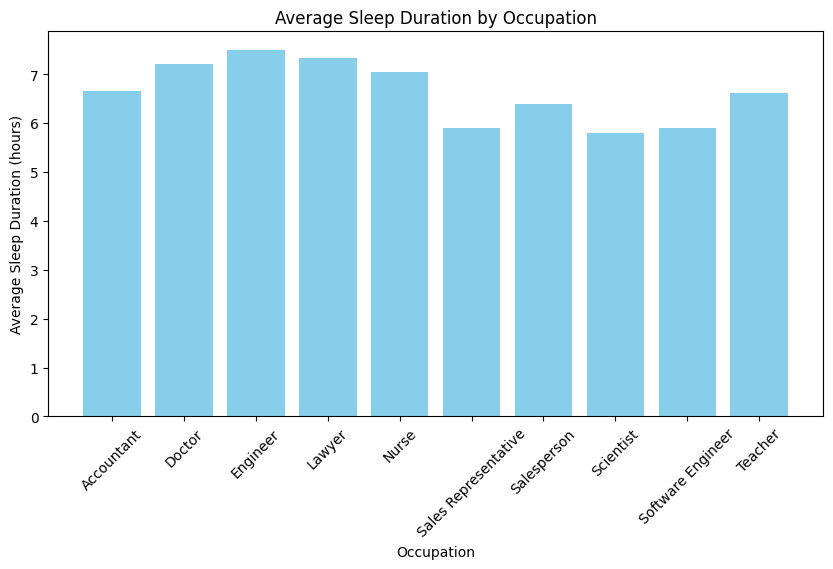

In [6]:
import matplotlib.pyplot as plt

# Group and compute mean
sleep_by_occupation = df.groupby('Occupation')['Sleep Duration'].mean()

# Plot
occupations = sleep_by_occupation.index
avg_sleep = sleep_by_occupation.values

plt.figure(figsize=(10, 5))
plt.bar(occupations, avg_sleep, color='skyblue')
plt.title("Average Sleep Duration by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Sleep Duration (hours)")
plt.xticks(rotation=45)
plt.show()

### Insights:
 
### 1. Visual confirms Engineer has more average sleep duration.
 
### 2. Where as Scientist has less average sleep duration.

/tmp/ipykernel_37/4055606053.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sleep_by_age = df.groupby('Age_Group')['Sleep Duration'].mean()


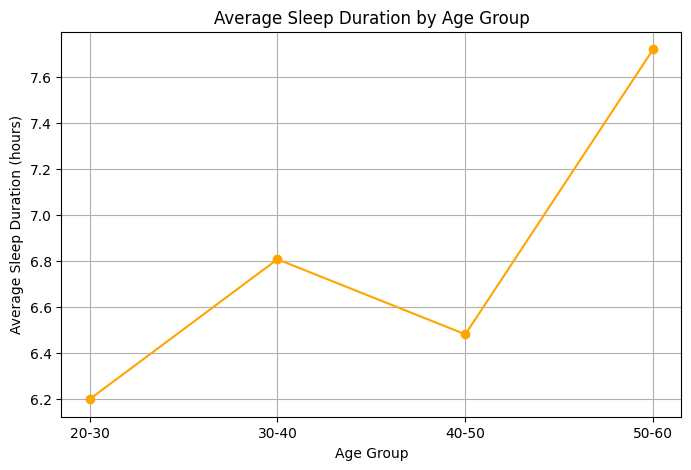

NameError: name 'sns' is not defined

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 100], 
                         labels=['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+'])

# Compute average sleep duration per age group
avg_sleep_by_age = df.groupby('Age_Group')['Sleep Duration'].mean()

# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(avg_sleep_by_age.index, avg_sleep_by_age.values, marker='o', color='orange')
plt.title("Average Sleep Duration by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Sleep Duration (hours)")
plt.grid(True)
plt.show()# Histogram of Age
sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Distribution of Age")
plt.show()

### Insights:
 
### 1. Age group of 20-30 has least average sleep duration.
 
### 2. Age group of 50-60 has most average sleep duration.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


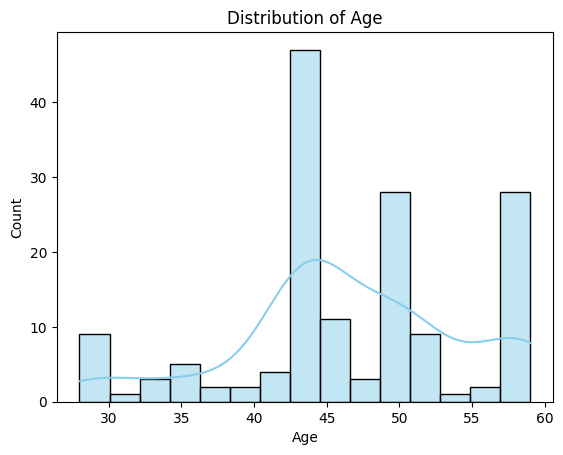

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Age
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Insights:
 
### 1. Most people were middle aged adults, peak around 40-45 years.

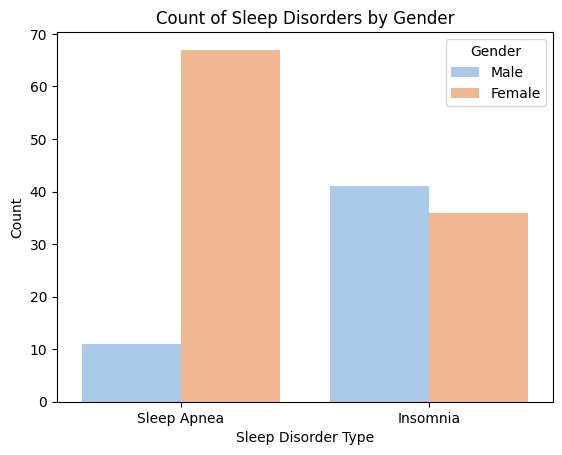

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sleep Disorder', hue='Gender', data=df, palette='pastel')
plt.title("Count of Sleep Disorders by Gender")
plt.xlabel("Sleep Disorder Type")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.show()

### Insights:
 
### 1. Female count is more when the disorder is sleep apnea.

### 2. Male count is more when comes to Insomnia disorder.

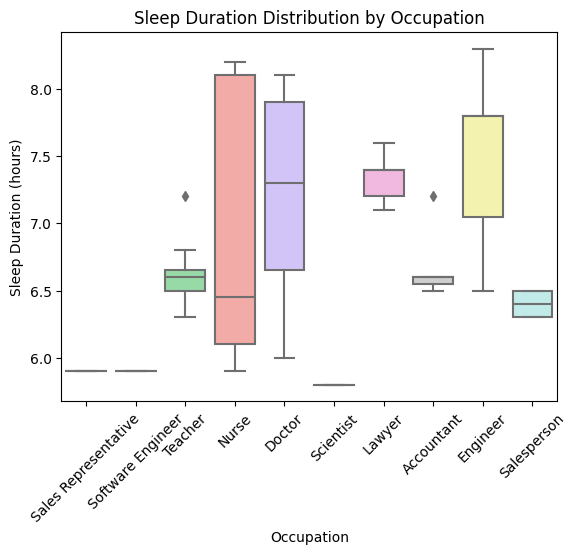

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Occupation', y='Sleep Duration', data=df, palette='pastel')
plt.title("Sleep Duration Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Sleep Duration (hours)")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

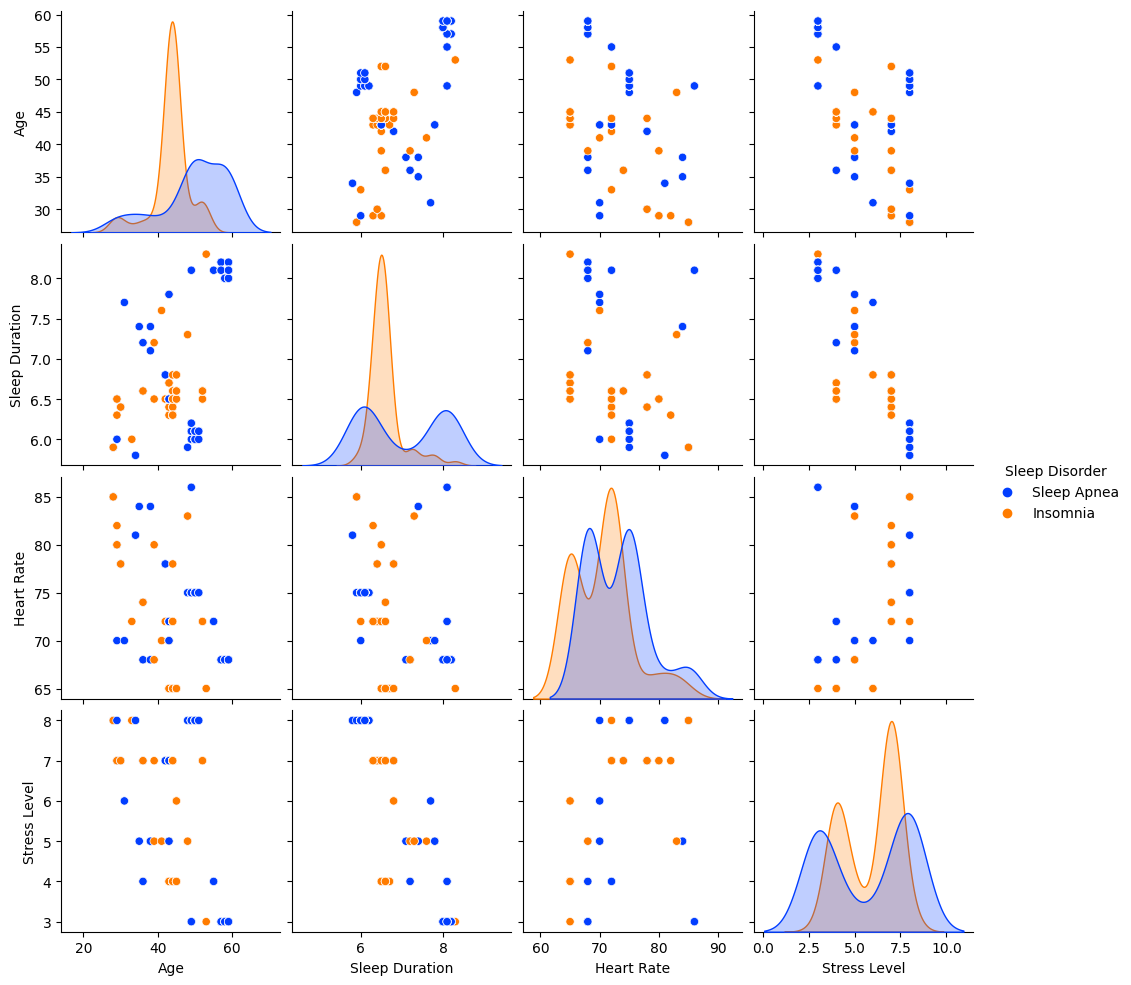

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = ['Age', 'Sleep Duration', 'Heart Rate', 'Stress Level']

# Pairplot colored by Sleep Disorder
sns.pairplot(df[numeric_cols + ['Sleep Disorder']], hue='Sleep Disorder', palette='bright')
plt.show()

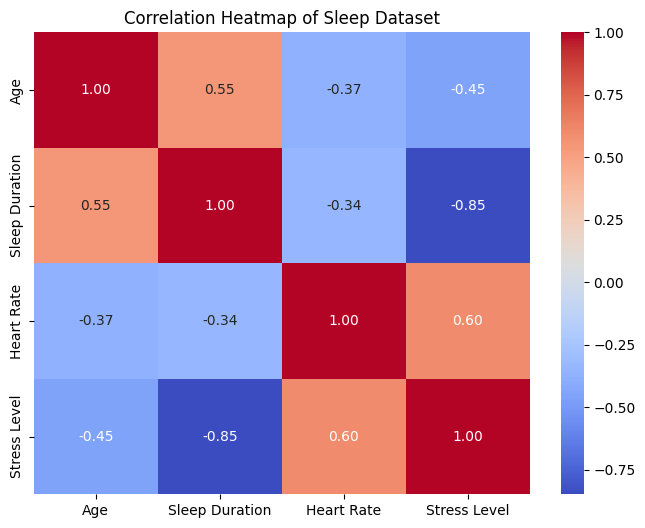

In [12]:
# Select only numeric columns
numeric_cols = ['Age', 'Sleep Duration', 'Heart Rate', 'Stress Level']

# Compute correlation
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Sleep Dataset")
plt.show()

### Insights:
 
### 1. Age has positive correlation with survival (~0.19).
 
### 2. Age has slight negative correlation with survival (~-0.35).
 